In [1]:
import matplotlib.pyplot as plt
from triangulate import triangulate, Polygon, coloring, read_polygon

In [9]:
def generate_corn(n):
    xs = [0]
    ys = [0]
    x = 1
    for i in range(n):
        if i > 0:   
            xs.append(x); ys.append(1)
        xs.append(x+0.5); ys.append(2)
        if i < n-1:
            xs.append(x + 1.0); ys.append(1)
        x += 2
    
    #xs.append(x); ys.append(1)

    xs.append(x); ys.append(0)

    return xs, ys



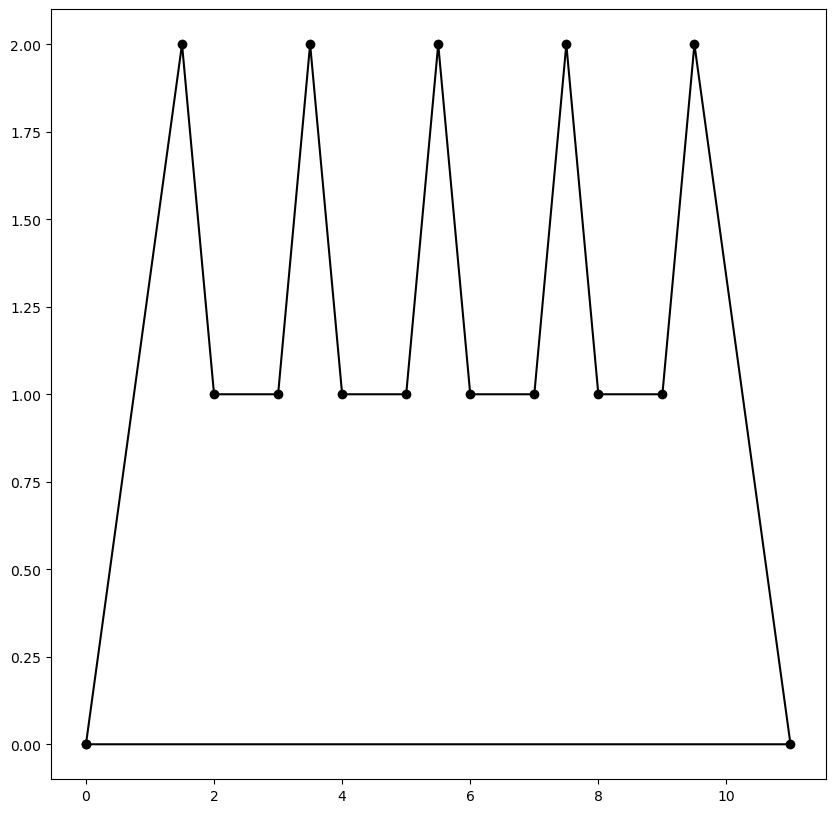

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
xs, ys = generate_corn(5)
polygon = Polygon(xs, ys)
polygon.plot(ax)
plt.savefig("./tex/figures/conr_example.png")
plt.show()

In [12]:
def plot_colors(ax, pol, colors):
    for color in [1, 2, 3]:
        verts = [i for i in range(len(colors)) if colors[i] == color]
        xs = [pol.xs[pol.topology[i]] for i in verts]
        ys = [pol.ys[pol.topology[i]] for i in verts]
        ax.plot(xs, ys, lw=0, marker="o", label=f"qtd={len(verts)}")

Tamanho poligono = 15


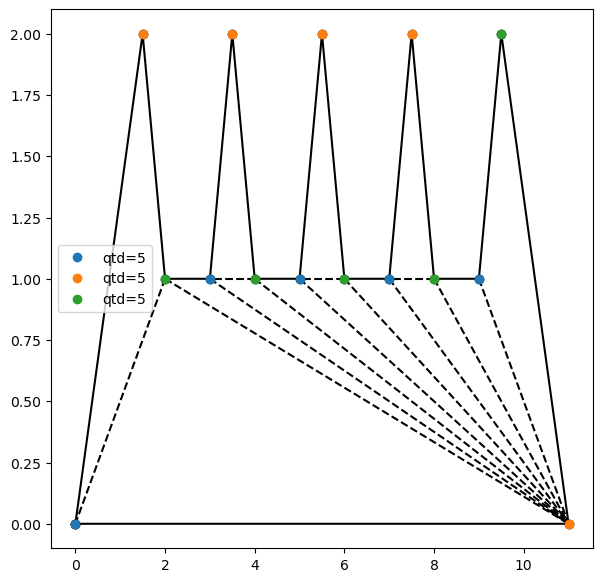

In [13]:
xs, ys = generate_corn(5)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
p = Polygon(xs, ys)
print(f"Tamanho poligono = {p.get_size()}")

diags = triangulate(p,return_diags=True)

for diag in diags:
    x0 = p.xs[diag[0]]
    x1 = p.xs[diag[1]]
    y0 = p.ys[diag[0]]
    y1 = p.ys[diag[1]]
    ax.plot([x0, x1], [y0, y1], color="black", ls="--")

p.plot(ax)

colors = coloring(p)
plot_colors(ax, p, colors)
ax.legend()

plt.savefig("./tex/figures/corn_example_coloring.png")

plt.show()

Tamanho poligono = 100


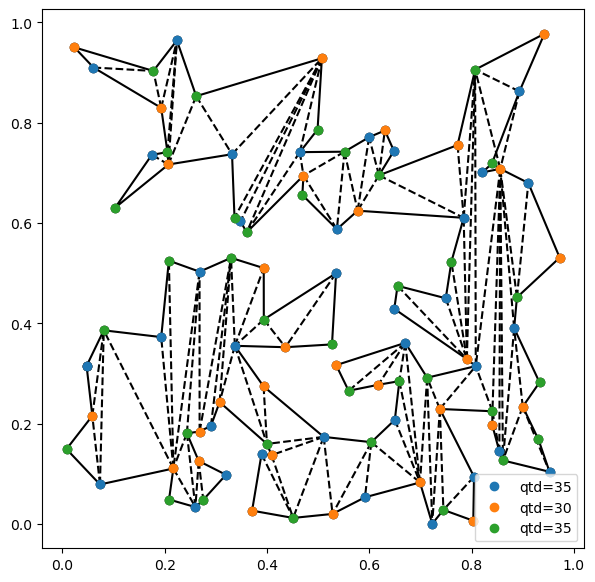

In [14]:
xs, ys = read_polygon("./data/caxeiro/polygon_100_1.txt", close_polygon=False)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
p = Polygon(xs, ys)
print(f"Tamanho poligono = {p.get_size()}")

diags = triangulate(p,return_diags=True)

for diag in diags:
    x0 = p.xs[diag[0]]
    x1 = p.xs[diag[1]]
    y0 = p.ys[diag[0]]
    y1 = p.ys[diag[1]]
    ax.plot([x0, x1], [y0, y1], color="black", ls="--")

p.plot(ax)

colors = coloring(p)
plot_colors(ax, p, colors)
ax.legend()

plt.savefig("./tex/figures/caxeiro_color.png")

plt.show()